# **决策树实验**

## **案例内容介绍**


**决策树简介**

决策树（Decision Tree)是一类常见的机器学习方法，是一种非常常用的分类方法，它是一种监督学习。

常见的决策树算法有ID3，C4.5、C5.0和CART（classification and regression tree），CART的分类效果一般要优于其他决策树。

构造决策树的方法简单直观。当我们想要用机器学习的方法区构造这样一颗决策树的时候则需要考虑两个问题:

（1）如何选择分支节点上的特征。

（2）设置什么样的终止条件。

**信息熵**

1948 年，香农提出了“信息熵”(shāng) 的概念，香农将其定义为离散随机时间出现的概率，一个系统越是有序，信息熵就越低，反之一个系统越是混乱，它的信息熵就越高。所以信息熵可以认为是系统有序化程度的一个度量。

信息增益 = 信息熵 - 条件熵

## **实验目标**
1. 利用Python对决策树调用

## **实验步骤**

### 1. 导入相关库

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

### 2. 加载数据

In [2]:
# 数据集实例化，并划分训练集和测试集
# test_size 参数表示：测试集在数据集中的比例
wine = load_wine()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

### 3. 构建决策树

In [3]:
#criterion：分裂节点所用的标准，可选“gini”, “entropy”，默认“gini”
#splitter：用于在每个节点上选择拆分的策略。可选“best”, “random”
#max_depth：树的最大深度。如果为None，则将节点展开
#random_state：随机种子，负责控制分裂特征的随机性，为整数。
clf=tree.DecisionTreeClassifier(criterion="entropy"
                               , random_state=30
                                 ,splitter="best"
                                 ,max_depth=5)
clf=clf.fit(Xtrain,Ytrain)

### 4. 决策树绘制

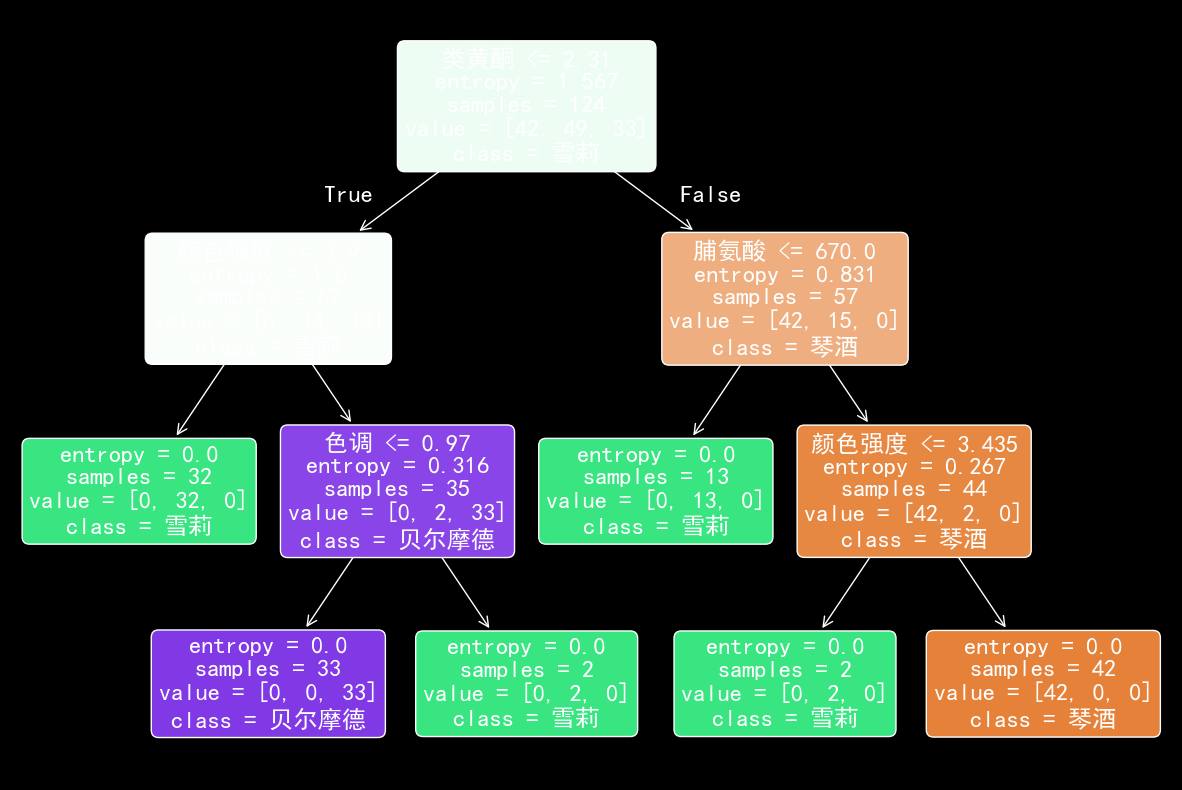

In [4]:
#  画出一棵决策树
plt.figure(figsize=(15, 10))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
#plt.rcParams['axes.unicode_minus']=False 
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
plot_tree(clf,feature_names= feature_name,class_names=["琴酒","雪莉","贝尔摩德"],filled=True,rounded=True )
plt.show()

### 5. 结果查看

In [5]:
# 查看结果
score=clf.score(Xtest,Ytest)
print(score)
# 查看特征变量的使用情况
[*zip(feature_name,clf.feature_importances_)]


0.9074074074074074


[('酒精', np.float64(0.0)),
 ('苹果酸', np.float64(0.0)),
 ('灰', np.float64(0.0)),
 ('灰的碱性', np.float64(0.0)),
 ('镁', np.float64(0.0)),
 ('总酚', np.float64(0.0)),
 ('类黄酮', np.float64(0.4111762131436989)),
 ('非黄烷类酚类', np.float64(0.0)),
 ('花青素', np.float64(0.0)),
 ('颜色强度', np.float64(0.34833707690084353)),
 ('色调', np.float64(0.05693430347582193)),
 ('od280/od315稀释葡萄酒', np.float64(0.0)),
 ('脯氨酸', np.float64(0.18355240647963558))]